# Task 1: Exploration of Customer Purchasing Behavior

Exploratory data analysis (EDA) helps us unravel the nature of the data and sometimes informs how we approach modeling. In this task, we will explore customer behavior, focusing on features like promotions, holidays, seasonality, and competitor distance, which affect sales. 

We will clean the data, handle missing values, detect outliers, and visualize various features to gain insights.

---

### Step 1: Data Cleaning
We start by building a pipeline to handle missing data and detect outliers. This ensures that our analysis is not skewed by inconsistent data.


In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data loading our data is in CSV format
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
store = pd.read_csv('../data/store.csv')

In [3]:
from scripts.EDA_scripts import CustomerBehaviorAnalyzer
df=pd.DataFrame()
cba=CustomerBehaviorAnalyzer(df)

In [4]:
# Merges the train and test data with the store data on the store column
merge_train_df, merge_test_df = cba.merge_data(train, test, store)

2024-09-19 23:07:46 - INFO - Merging train and test data with store data


In [5]:
merge_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
merge_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Data Cleaning

In [7]:
merge_train_df['Date'] = pd.to_datetime(merge_train_df['Date'])
merge_test_df['Date'] = pd.to_datetime(merge_test_df['Date'])

##### Handle missing data

In [8]:
# Clean training and test datasets
train_cleaned = cba.clean_data(merge_train_df)
# test_cleaned = cba.clean_data(merge_test_df)

# Check for missing values after cleaning
train_cleaned.isnull().sum()
# test_cleaned.isnull().sum()

2024-09-19 23:07:49 - INFO - Cleaning data


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    316306
CompetitionOpenSinceYear     316306
Promo2                            0
Promo2SinceWeek              494384
Promo2SinceYear              494384
PromoInterval                494384
dtype: int64

### Step 2: Explore the Distribution of Promotions in Training vs Test Sets
Let's check if promotions are distributed similarly between the training and test datasets. This is important to ensure that the test set is representative.

2024-09-19 23:07:50 - INFO - Plotting promotion distribution


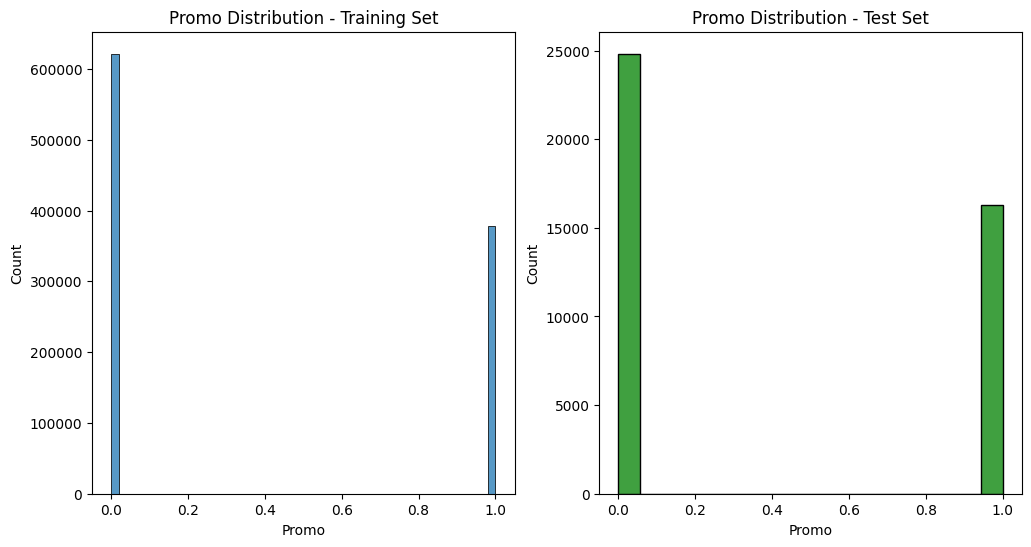

In [9]:
cba.plot_promo_distribution(train_cleaned, merge_test_df)

### Step 3: Sales Behavior Before, During, and After Holidays
We will now explore how sales behave around holidays. This includes checking for spikes or dips in sales before, during, and after holidays.

In [10]:
cba.add_holiday_columns(train_cleaned)

2024-09-19 23:07:53 - INFO - Adding holiday columns...


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,IsHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,0


2024-09-19 23:07:55 - INFO - Plotting sales effects due to holidays...


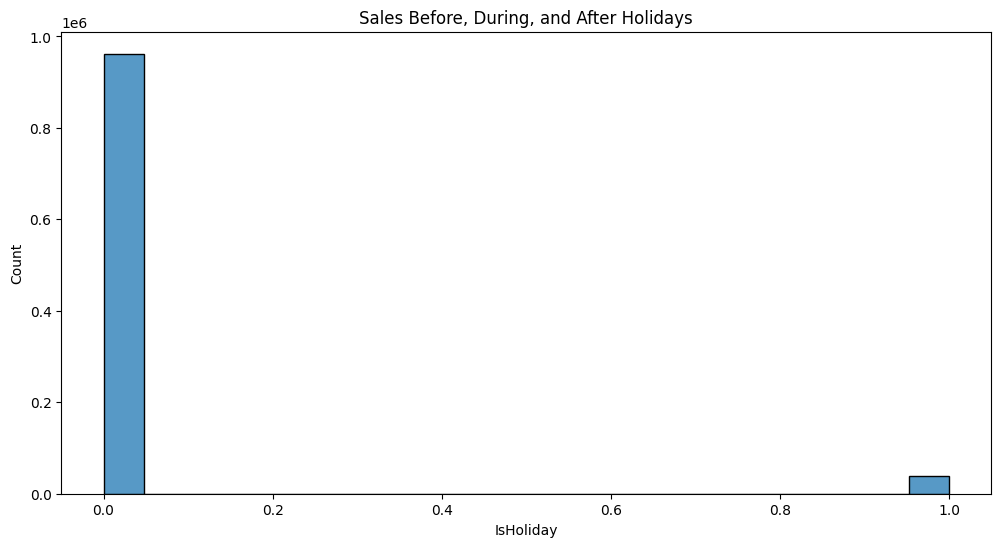

In [11]:
cba.plot_sales_holiday_behavior(train_cleaned)

2024-09-19 23:18:10 - INFO - Adding holiday status column...
2024-09-19 23:18:11 - INFO - Plotting holiday effects...


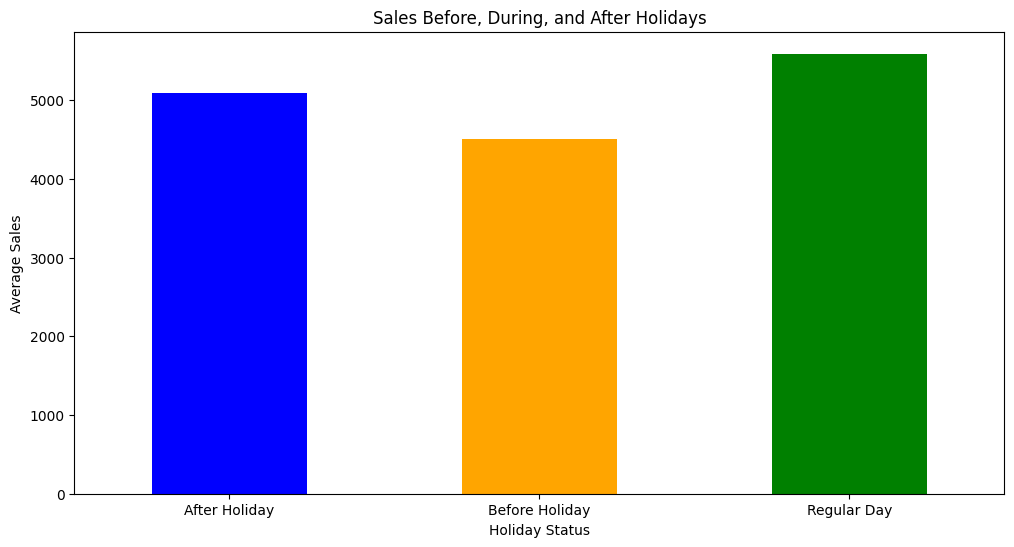

In [18]:
holiday_data = cba.add_holiday_status(train_cleaned)
cba.plot_holiday_effects(holiday_data, "Sales Before, During, and After Holidays")

### Step 4: Seasonal Purchase Behavior (e.g., Christmas, Easter)
We now explore how seasonal events, such as Christmas and Easter, affect purchasing behavior.


In [ ]:
seasonal_data = cba.add_holiday_season(train_cleaned)
print(seasonal_data[['Date', 'IsChristmasSeason', 'IsEasterSeason']].head())

        Date  IsChristmasSeason  IsEasterSeason
0 2015-07-31              False           False
1 2015-07-31              False           False
2 2015-07-31              False           False
3 2015-07-31              False           False
4 2015-07-31              False           False


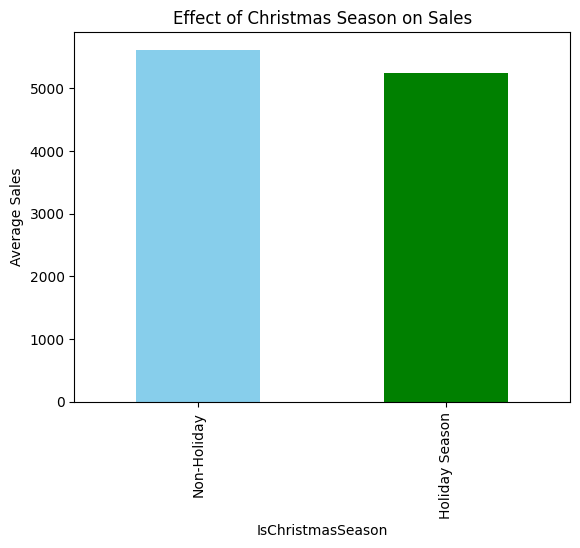

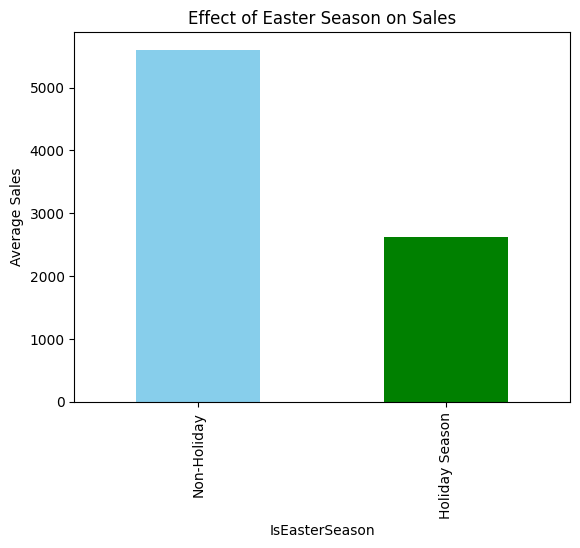

In [ ]:
# Plot sales behavior during Christmas
cba.plot_seasonal_sales(seasonal_data, 'IsChristmasSeason', 'Effect of Christmas Season on Sales')

# Plot sales behavior during Easter
cba.plot_seasonal_sales(seasonal_data, 'IsEasterSeason', 'Effect of Easter Season on Sales')

### Step 5: Correlation Between Sales and Number of Customers
Here, we check the correlation between sales and the number of customers.


Correlation between Sales and Customers: 0.8943592286723475


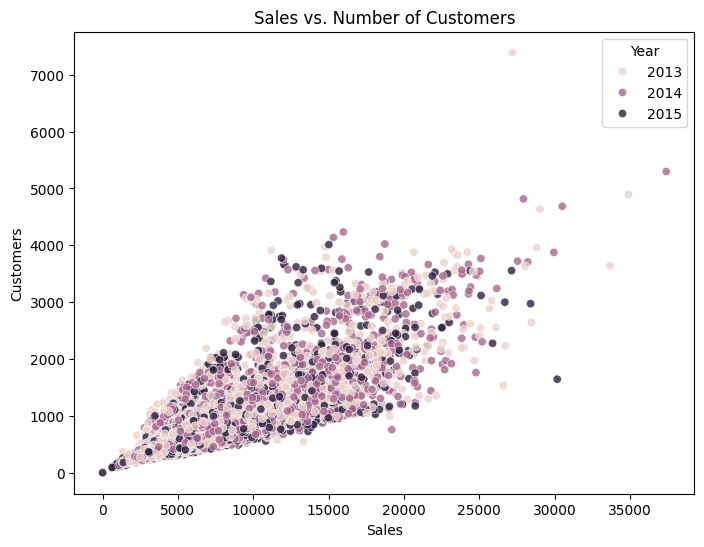

In [ ]:
# Take a sample 50000 daata and Correlation analysis and scatter plot
temp_df=merge_train_df.sample(40000)
cba.correlation_sales_customers(temp_df)

### Step 6: Effect of Promotions on Sales
Let's now investigate how promotions affect sales and customer behavior.

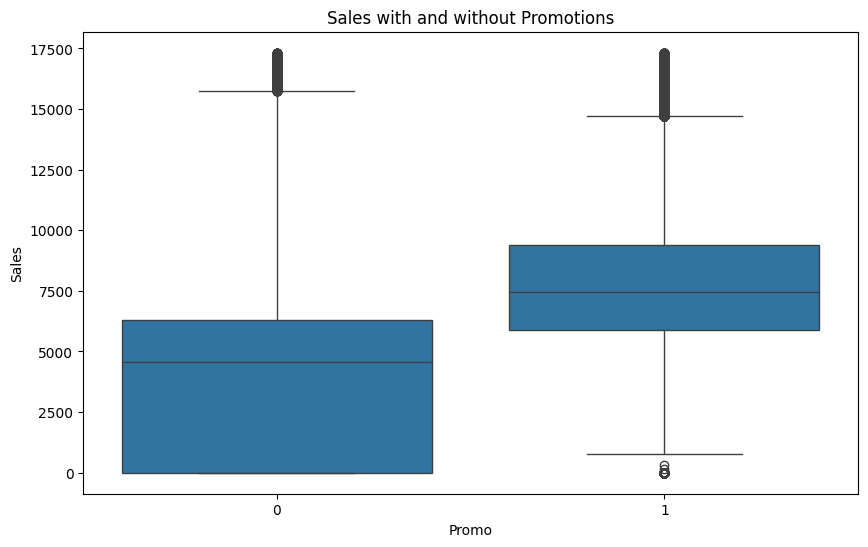

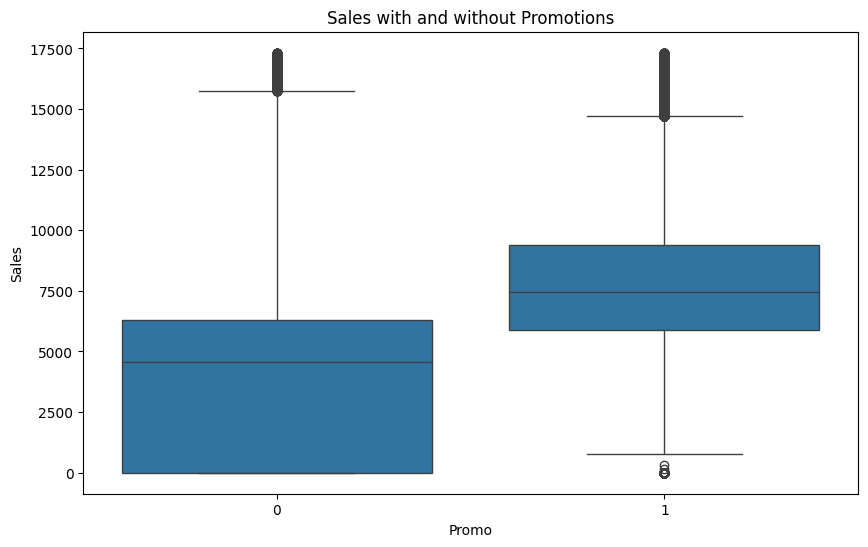

In [ ]:
# plot_sales_promo_effect(train_cleaned)
cba.plot_sales_promo_effect(train_cleaned)

### Step 7: Customer Behavior During Store Opening and Closing Times
Let's analyze how customers behave during store opening and closing times.

2024-09-19 22:43:38 - INFO - Plotting customer traffic based on store opening status...


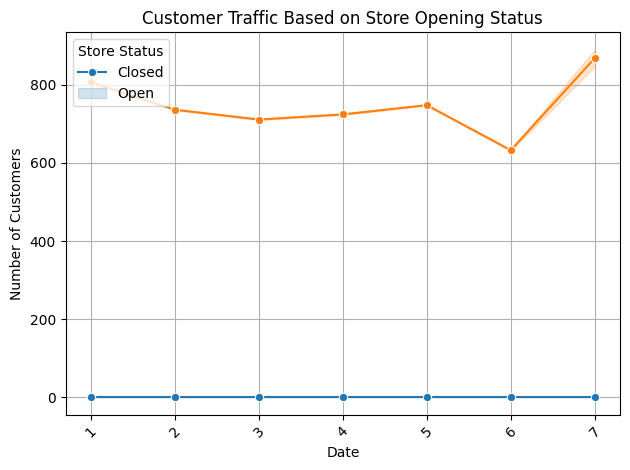

In [ ]:
cba.customer_opening_behavior(train_cleaned)

### Step 8: Effect of Competitor Distance on Sales
Let's check how the distance to the nearest competitor affects sales.


2024-09-19 23:15:03 - INFO - Plotting competitor distance vs sales...


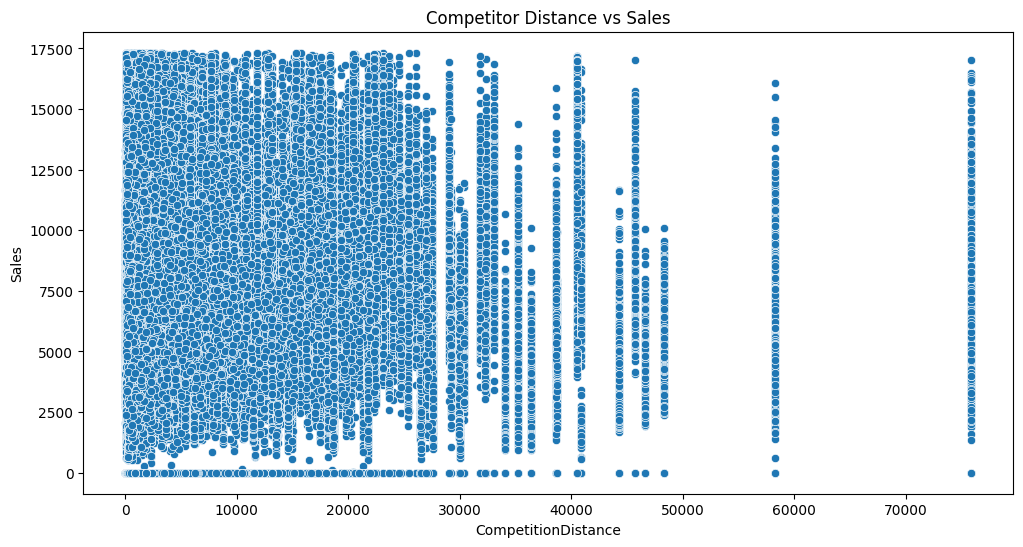

In [17]:
# Scatter plot to check distance vs sales relationship
cba.competitor_distance_sales(train_cleaned)


### Step 9: Assortment Type vs Sales
Lastly, we will explore the effect of assortment type on sales.


In [ ]:
# Plotting sales based on assortment type
cba.assortment_sales(train_cleaned)

AttributeError: 'CustomerBehaviorAnalyzer' object has no attribute 'assortment_sales'

## Conclusion

This concludes our exploratory data analysis of customer purchasing behavior across various stores. The analysis reveals the importance of promotions, seasonality, holidays, competitor distance, and store opening times in driving sales. The insights derived from this analysis will inform further steps in building predictive models for sales forecasting.


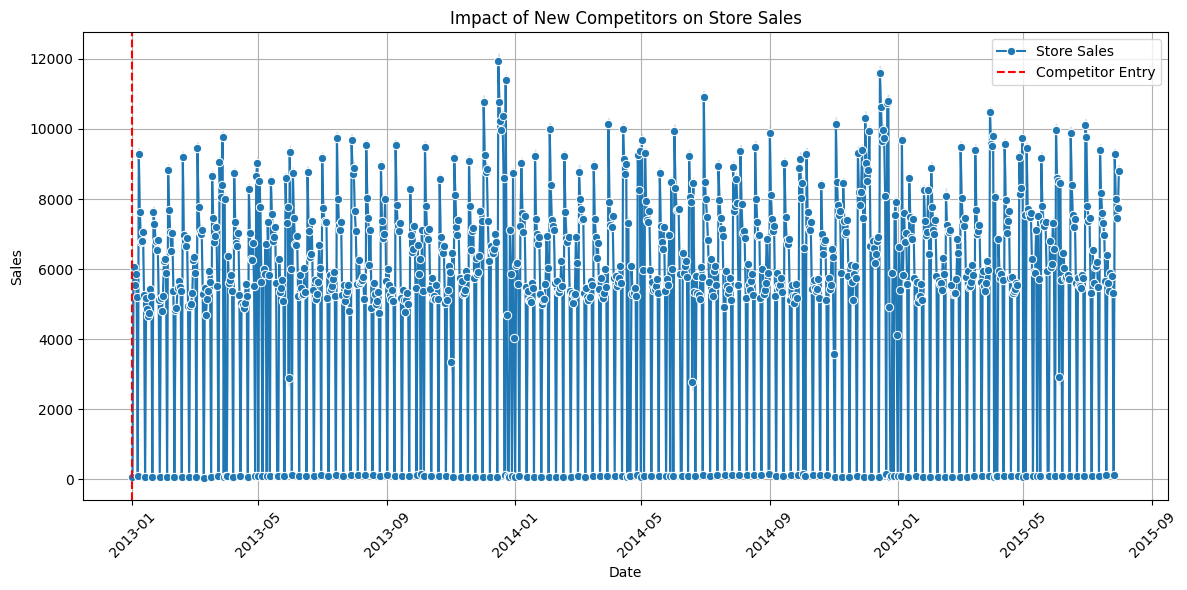

In [ ]:
cba.plot_sales_vs_competitor(train_cleaned)